<a href="https://colab.research.google.com/github/n-prathyusha82/Codesoft_internship/blob/main/credit_card_fraud_detection(isolation_forest%2Ccodesoft)_project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install chart-studio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot

In [4]:
data = pd.read_csv('/content/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
data1= data.sample(frac = 0.1,random_state=1)
data1.shape

(1395, 31)

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,...,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13953.000000,13953.000000
mean,10121.161817,-0.235676,0.284287,0.846047,0.302775,-0.118730,0.128013,-0.157297,-0.016148,0.989827,...,-0.068037,-0.157471,-0.035585,0.011158,0.117019,0.035544,0.012787,0.002122,63.882442,0.004013
std,7739.625811,1.720315,1.394804,1.561376,1.500595,1.289494,1.320395,1.238583,1.262024,1.214044,...,0.873942,0.621845,0.499807,0.587225,0.427953,0.558290,0.399550,0.255710,177.887021,0.063227
min,0.000000,-27.670569,-34.607649,-24.667741,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2984.250000,-0.969786,-0.282728,0.407297,-0.623141,-0.717155,-0.624025,-0.616307,-0.182270,0.288101,...,-0.271778,-0.549723,-0.173807,-0.339656,-0.135887,-0.374596,-0.076862,-0.014869,5.490000,0.000000
50%,9086.500000,-0.319439,0.252904,0.960978,0.220104,-0.191627,-0.144198,-0.111960,0.016945,0.971414,...,-0.132304,-0.122777,-0.045041,0.060208,0.155162,-0.035825,-0.000950,0.016238,15.690000,0.000000
75%,17103.500000,1.162662,0.884741,1.607031,1.198942,0.351255,0.508494,0.421830,0.265736,1.654184,...,0.018677,0.228997,0.069750,0.392734,0.393032,0.375271,0.098516,0.072497,52.150000,0.000000
max,24759.000000,1.960497,10.558600,4.101716,11.927512,34.099309,21.393069,34.303177,10.535558,10.392889,...,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


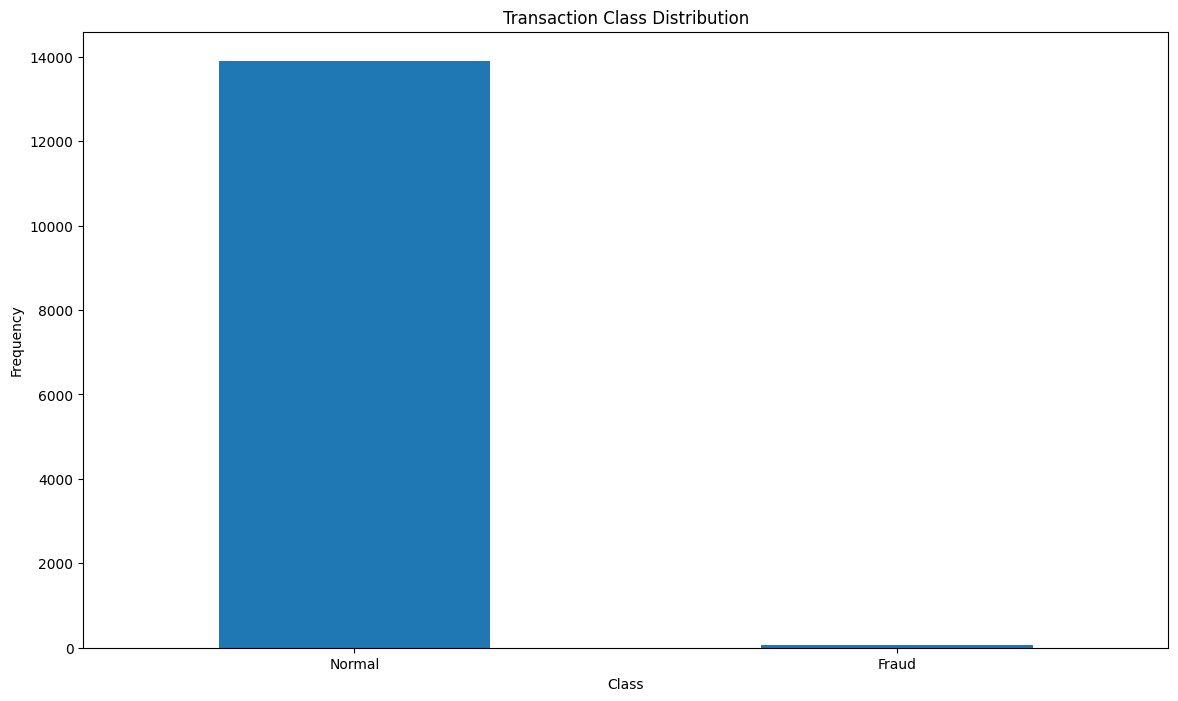

In [8]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [9]:
Normal = data[data['Class']==0]
Fraud = data[data['Class']==1]

In [10]:
Normal.shape

(13897, 31)

In [11]:
Fraud.shape

(56, 31)

In [12]:
Normal.Amount.describe()

count    13897.000000
mean        63.773909
std        177.164503
min          0.000000
25%          5.770000
50%         15.900000
75%         52.370000
max       7712.430000
Name: Amount, dtype: float64

In [13]:
Fraud.Amount.describe()

count      56.000000
mean       90.815893
std       310.308450
min         0.000000
25%         1.000000
50%         1.000000
75%         1.025000
max      1809.680000
Name: Amount, dtype: float64

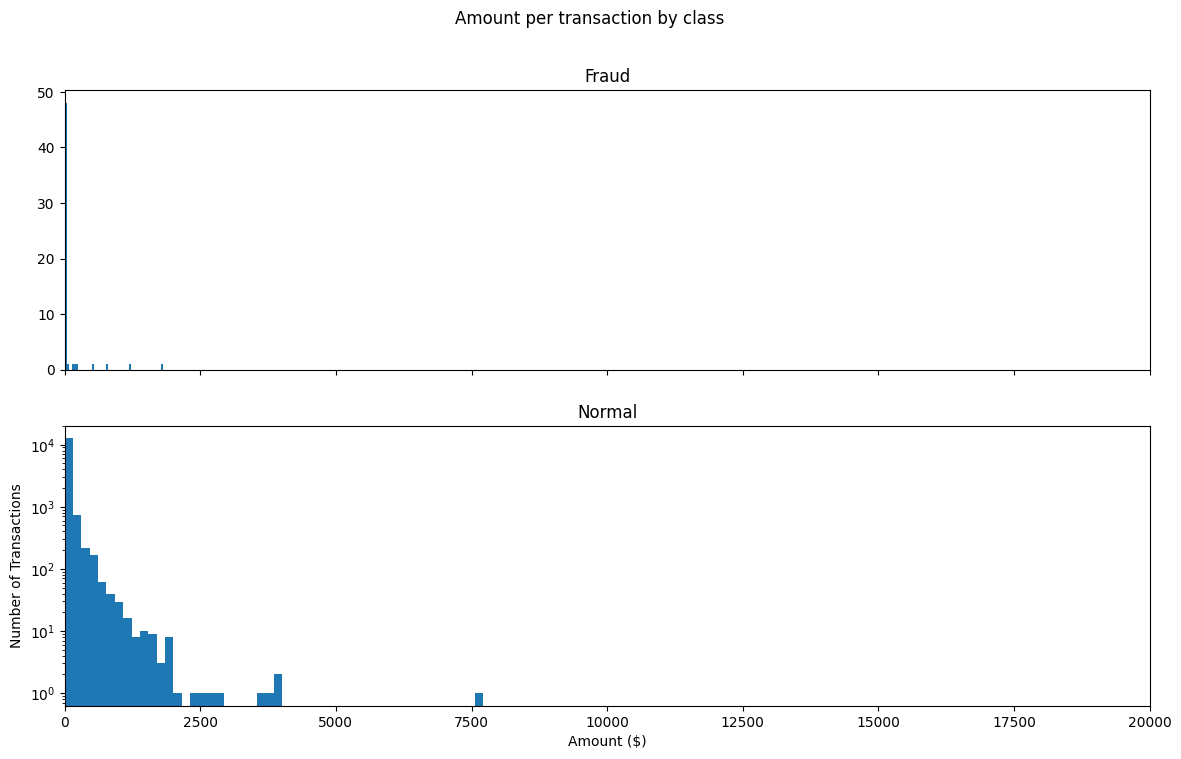

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

**Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.**

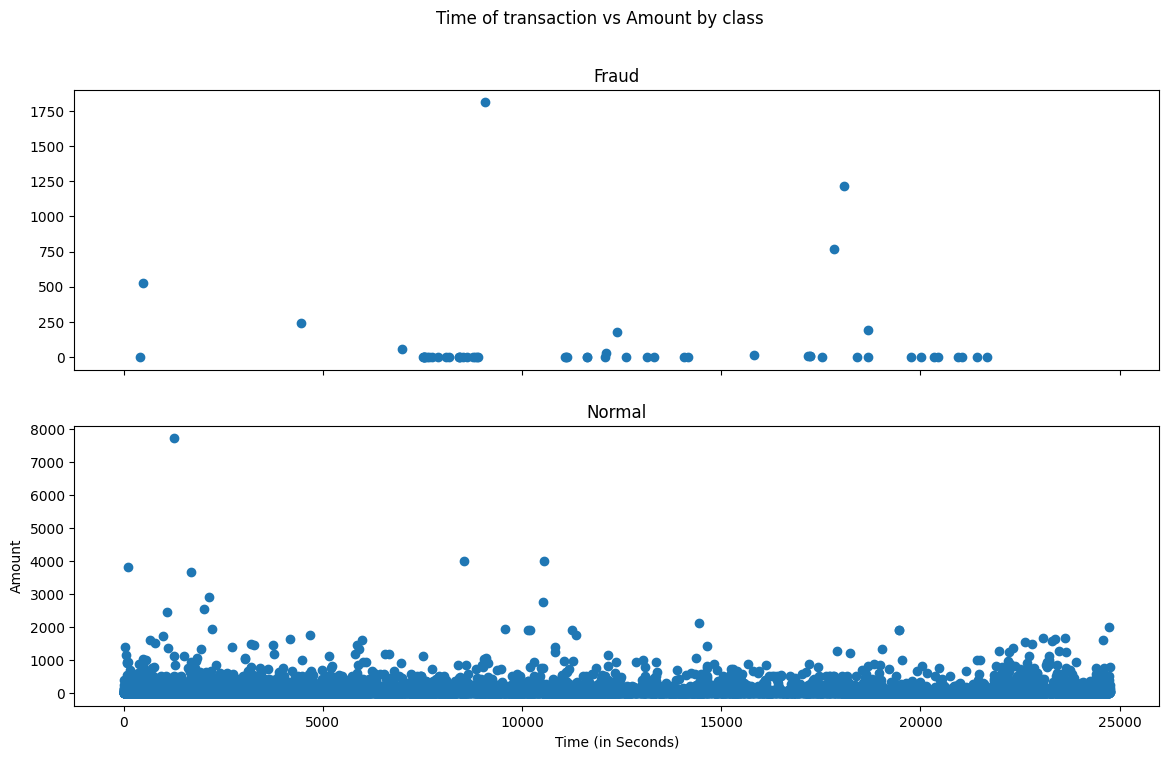

In [15]:
#Graphical representation of the data

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show();

In [16]:
init_notebook_mode(connected=True)
plotly.offline.init_notebook_mode(connected=True)


In [17]:
# Create a trace

trace = go.Scatter(
    x = Fraud.Time,
    y = Fraud.Amount,
    mode = 'markers'
)
data = [trace]

plotly.offline.iplot({
    "data": data
})

 Now let us take a sample of the dataset for out modelling and prediction


In [18]:
data1.shape

(1395, 31)

In [19]:
Fraud = data1[data1['Class']==1]
Valid = data1[data1['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

In [20]:
print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))

0.0021551724137931034
Fraud Cases : 3
Valid Cases : 1392


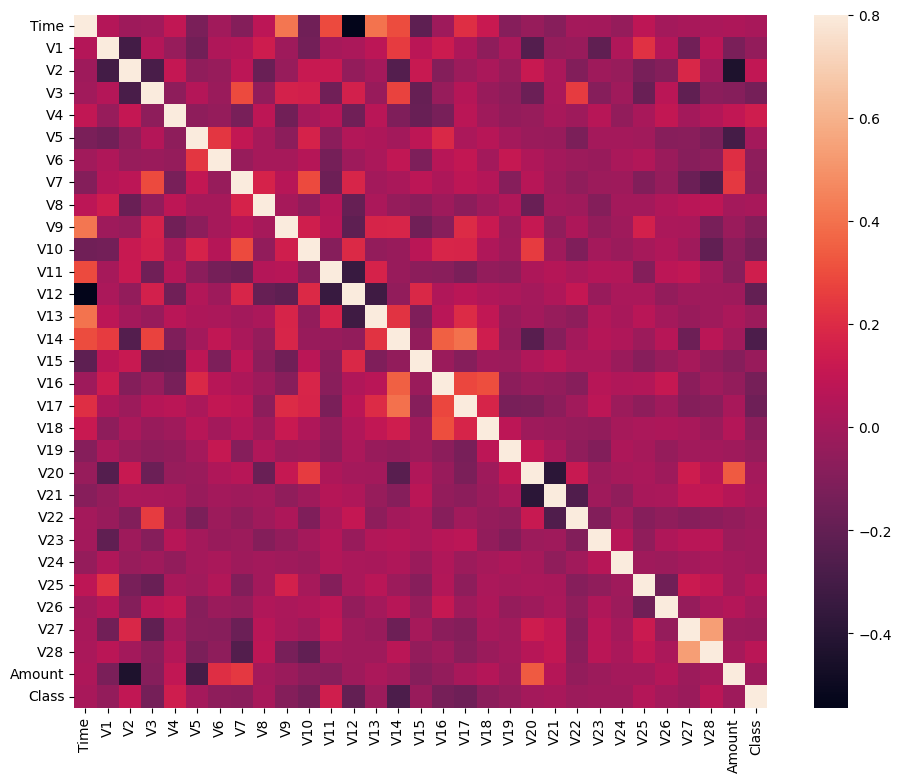

In [21]:
correlation_matrix = data1.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

The above correlation matrix shows that none of the V1 to V28 PCA components have any correlation to each other however if we observe Class has some form positive and negative correlations with the V components but has no correlation with Time and Amount.

In [22]:
#Get all the columns from the dataframe

columns = data1.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting
target = "Class"
# Define a random state
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(1395, 30)
(1395,)


In [23]:
classifiers = {
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples=len(X),
                                       contamination=outlier_fraction, random_state=state, verbose=0),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine": OneClassSVM(kernel='rbf', degree=3, gamma=0.1, nu=0.05,
                                         max_iter=-1)
}


In [24]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

n_outliers = len(Fraud)
for i, (clf_name, clf) in enumerate(classifiers.items()):
    # Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        clf = LocalOutlierFactor(novelty=False)  # Set novelty to False
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:
        if clf_name == "Isolation Forest":
            # Use Isolation Forest with a contamination value of 0.05
            clf = IsolationForest(contamination=0.05)
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)

    # Reshape the prediction values to 0 for Valid transactions, 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    n_errors = (y_pred != Y).sum()

    # Run Classification Metrics
    print("{}: {}".format(clf_name, n_errors))
    print("Accuracy Score:")
    print(accuracy_score(Y, y_pred))
    print("Classification Report:")
    print(classification_report(Y, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



Isolation Forest: 69
Accuracy Score:
0.9505376344086022
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      1392
         1.0       0.03      0.67      0.05         3

    accuracy                           0.95      1395
   macro avg       0.51      0.81      0.51      1395
weighted avg       1.00      0.95      0.97      1395

Local Outlier Factor: 157
Accuracy Score:
0.8874551971326164
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94      1392
         1.0       0.00      0.00      0.00         3

    accuracy                           0.89      1395
   macro avg       0.50      0.44      0.47      1395
weighted avg       1.00      0.89      0.94      1395

Support Vector Machine: 518
Accuracy Score:
0.628673835125448
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.63      0.77